In [6]:
import pandas as pd

read_path = "data/data_0_c.csv"
df_data_1 = pd.read_csv(open(read_path,encoding = "utf8"))

df_data_1 = df_data_1.fillna(0)
df_data_1 = df_data_1[df_data_1['转炉终点温度'] != 0]
df_data_1 = df_data_1[df_data_1['转炉终点Mn'] != 0]

read_path = "data/money_0.csv"
df_money_0 = pd.read_csv(read_path)
df_money_0 = df_money_0.fillna(0)

df_data_1.columns

Index(['炉号', '钢号', '转炉终点温度', '转炉终点C', '转炉终点Mn', '转炉终点S', '转炉终点P', '转炉终点Si',
       '钢水净重', '连铸正样C', '连铸正样Mn', '连铸正样S', '连铸正样P', '连铸正样Si', '连铸正样Ceq_val',
       '连铸正样Cr', '连铸正样Ni_val', '连铸正样Cu_val', '连铸正样V_val', '连铸正样Alt_val',
       '连铸正样Als_val', '连铸正样Mo_val', '氮化钒铁FeV55N11-A', '低铝硅铁', '钒氮合金(进口)',
       '钒铁(FeV50-A)', '钒铁(FeV50-B)', '硅铝钙', '硅铝合金FeAl30Si25', '硅铝锰合金球',
       '硅锰面（硅锰渣）', '硅铁(合格块)', '硅铁FeSi75-B', '石油焦增碳剂', '锰硅合金FeMn64Si27(合格块)',
       '锰硅合金FeMn68Si18(合格块)', '碳化硅(55%)', '硅钙碳脱氧剂'],
      dtype='object')

In [7]:
def GetResult(element="C"):

    All_element = 0

    for i in set(df_money_0[df_money_0[element] != 0]['合金配料']):
        All_element = All_element + df_data_1[i] * \
            df_money_0[df_money_0['合金配料'] == i][element].values[0]

    df_result = pd.DataFrame()
    df_result[element + '_Yield'] = (df_data_1['钢水净重'] * df_data_1['连铸正样' + element] -
                                     df_data_1['钢水净重'] * df_data_1['转炉终点' + element])/All_element

    return df_result

In [8]:
def Get_Element_Yield(element = "C"):
    df_result = GetResult(element = element)
    df_data_1[element + '_Yield'] = df_result[element + '_Yield']

    return df_data_1

before clean : 226
after clean : 211
mean  C_Yield  : 0.9026621151895743


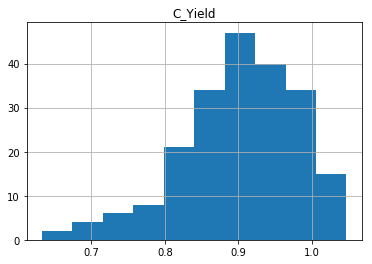

In [14]:
element = "C"

import matplotlib.pyplot as plt
%matplotlib inline
print("before clean :",len(df_data_1))
df_data_1_element_plot= Get_Element_Yield(element = element)

df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] <= 1.05]
df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] >=0]

print("after clean :",len(df_data_1_element_plot))
df_data_1_element_plot[[element +'_Yield']].hist()
print("mean ",element +'_Yield'," :",sum(df_data_1_element_plot[element +'_Yield'])/len(df_data_1_element_plot[element +'_Yield']))

df_data_1_element_plot.to_csv("data/df_data_1_"+ element + "_plot.csv",index=None)

plt.show()

before clean : 226
after clean : 222
mean  Mn_Yield  : 0.8927604019550919


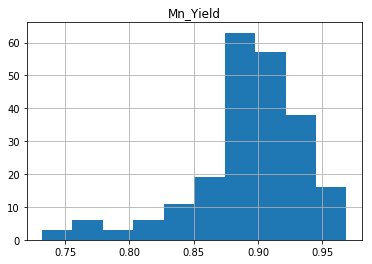

In [10]:
element = "Mn"

import matplotlib.pyplot as plt
%matplotlib inline
print("before clean :",len(df_data_1))
df_data_1_element_plot= Get_Element_Yield(element = element)

df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] <= 1.0]
df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] >=0.5]

print("after clean :",len(df_data_1_element_plot))
df_data_1_element_plot[[element +'_Yield']].hist()
print("mean ",element +'_Yield'," :",sum(df_data_1_element_plot[element +'_Yield'])/len(df_data_1_element_plot[element +'_Yield']))

df_data_1_element_plot.to_csv("data/df_data_1_"+ element + "_plot.csv",index=None)

plt.show()

before clean : 226
after clean : 207
mean  S_Yield  : 5.1517452889804085


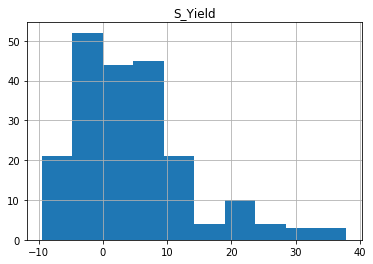

In [11]:
element = "S"

import matplotlib.pyplot as plt
%matplotlib inline
print("before clean :",len(df_data_1))
df_data_1_element_plot= Get_Element_Yield(element = element)

df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] <= 50]
df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] >=-10]

print("after clean :",len(df_data_1_element_plot))
df_data_1_element_plot[[element +'_Yield']].hist()
print("mean ",element +'_Yield'," :",sum(df_data_1_element_plot[element +'_Yield'])/len(df_data_1_element_plot[element +'_Yield']))

df_data_1_element_plot.to_csv("data/df_data_1_"+ element + "_plot.csv",index=None)

plt.show()

before clean : 226
after clean : 225
mean  P_Yield  : 0.8143628134015763


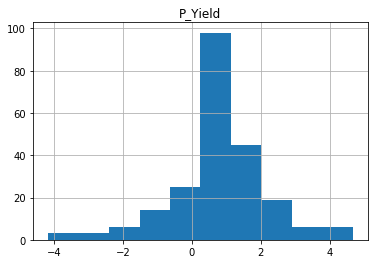

In [12]:
element = "P"

import matplotlib.pyplot as plt
%matplotlib inline
print("before clean :",len(df_data_1))
df_data_1_element_plot= Get_Element_Yield(element = element)

df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] <= 50]
df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] >=-10]

print("after clean :",len(df_data_1_element_plot))
df_data_1_element_plot[[element +'_Yield']].hist()
print("mean ",element +'_Yield'," :",sum(df_data_1_element_plot[element +'_Yield'])/len(df_data_1_element_plot[element +'_Yield']))

df_data_1_element_plot.to_csv("data/df_data_1_"+ element + "_plot.csv",index=None)

plt.show()

before clean : 226
after clean : 204
mean  Si_Yield  : 0.29369802498975495


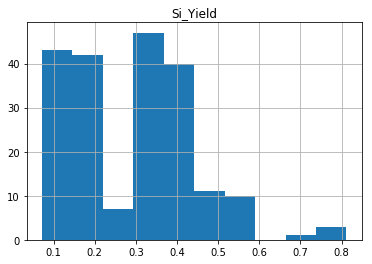

In [16]:
element = "Si"

import matplotlib.pyplot as plt
%matplotlib inline
print("before clean :",len(df_data_1))
df_data_1_element_plot= Get_Element_Yield(element = element)

df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] <= 1]
df_data_1_element_plot= df_data_1_element_plot[df_data_1_element_plot[element +'_Yield'] >=0]

print("after clean :",len(df_data_1_element_plot))
df_data_1_element_plot[[element +'_Yield']].hist()
print("mean ",element +'_Yield'," :",sum(df_data_1_element_plot[element +'_Yield'])/len(df_data_1_element_plot[element +'_Yield']))

df_data_1_element_plot.to_csv("data/df_data_1_"+ element + "_plot.csv",index=None)

plt.show()